# Action Recognition

#### Your objective is to construct action recognition models on a subset of the UCF101 dataset. The [UCF101 dataset](https://www.crcv.ucf.edu/data/UCF101.php) consists of a total of 13,320 videos spanning diverse human action categories. However, for the final project, our focus narrows down to a subset of the dataset, comprising 2,355 training videos and 969 test videos distributed among 30 action categories. You will have to build one binary classifier and one multi-class classifier.

## **1. Binary Classifier for JugglingBalls
#### Build a classifier for the class *JugglingBalls*. Your goal is to train a model to classify JugglingBalls videos as *positive* and the remaining videos as *negative*. You are free to choose any machine learning models from the class.
#### **1-1. Hyper-parameter Search  Show your hyperparameter search process using cross-validation. Present at least for one hyper-parameter with 10 different possible values.
#### **1-2. Model Training and Testing  Then, train your model with the best combination of the hyper parameters and run the model on the test set, and submit the results to the Kaggle competition. To get full marks, your model should outperform the baseline model, which is provided in Kaggle. You **must** show your test accuracy computed by Kaggle in this report.   


## 2. Multi-Class Classifier 
#### Build a multi-class classifier for all 30 action classes. Your goal is to train a model to classify videos into corresponding categories. You are free to choose any machine learning models from the class.
#### **2-1. Hyper-parameter Search .** Demonstrate your hyperparameter search process using cross-validation. Provide details for at least one hyperparameter with 10 different possible values.
#### **2-2. Model Training and Testing .** Following the hyperparameter search, train your model with the best combination of hyperparameters. Run the model on the test set and submit the results to the Kaggle competition. To get full marks, your model should outperform the baseline model, which is provided in Kaggle. You **must** show your test accuracy computed by Kaggle in this report.   




---

## **A. Data Download**
#### For your convenience, we have provided codes to download the dataset, which includes videos, true labels, and features.

#### **A-1. Download Features and Labels.**
#### Run the following code to download the features and the true labels of the videos. We extracted features from the [InceptionV3 model](https://arxiv.org/abs/1512.00567) that has been pre-trained on the [ImageNet-1k dataset](http://image-net.org/).
#### Frames are extracted from each video, and the pre-trained was used to obtain a 2048-D feature vector for every frame. We store the feature vectors for the first 20 frames. For example, you will find an array of shape (2355, 20, 2048) for `train_feature`, where the array contains features for 2,355 videos. Each video is represented by 20 frames, and each frame is encoded by a 2048-dimensional feature vector.
#### As each video is represented by a 20x2048 array, you may need to encode them into an N-dimensional vector. One approach is to  use only the feature vector for the first frame of each video.

In [ ]:
!pip install gdown
!gdown --id 1gO6BYxkNnnR7j_Iro4exIkpya91xVXhl # train feature
!gdown --id 1zcW5v-Jdv0BWeCpu6yMY9vZbSy7Va6j5 # train label
!gdown --id 1XY4wjqNwaZC8dFJNvtaXAA8oM9k7VBHm # test feature


#### **A-2. Download Videos.**
#### Run the following code to download the videos and the true label names of the videos. In `ucf101_subset_train.tar.gz`, you will find `train.csv` and the folder `./train/`.

In [ ]:
!gdown --id 1BC0KaP5OUrCAb10kaekN3iXrcfDQ_GU-
!tar xf "ucf101_subset_train.tar.gz"

In [1]:
# read in training dataset (features and labels) as well as the testing features wbose labels are to be submissed to kaggle
import numpy as np
with open('train_feature.npy', 'rb') as f:
  train_feature = np.load(f)
with open('train_label.npy', 'rb') as f:
  train_label = np.load(f)
with open('test_feature.npy', 'rb') as f:
  test_feature = np.load(f)

# Each datapoint (video) is made up of 20 frames with each frame being a vector in R^(2048)
print('Shape of train_feature: {0}'.format(train_feature.shape))
print('Shape of train_label: {0}'.format(len(train_label)))
print('Shape of test_feature: {0}'.format(test_feature.shape))

Shape of train_feature: (2355, 20, 2048)
Shape of train_label: 2355
Shape of test_feature: (969, 20, 2048)


#### The labels of the videos are represented as strings. Since models cannot process strings, it is necessary to convert these labels into integers. We use the following `label_list` to map the class labels to integers. This same `label_list` can be used to interpret the model's predictions.

In [2]:
from collections import defaultdict
label_list = ['ApplyLipstick', 'BalanceBeam', 'BlowingCandles', 'BodyWeightSquats',
                    'BreastStroke', 'CleanAndJerk', 'CuttingInKitchen', 'Fencing',
                    'FieldHockeyPenalty', 'HandstandWalking', 'HighJump', 'JugglingBalls',
                    'JumpingJack', 'MoppingFloor', 'ParallelBars', 'PizzaTossing',
                    'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PullUps',
                    'PushUps', 'Rafting', 'RopeClimbing', 'Skijet',
                    'SkyDiving', 'StillRings', 'SumoWrestling', 'TaiChi',
                    'UnevenBars', 'VolleyballSpiking']

# making dictonary 
index_to_label = defaultdict(str)
label_to_index = defaultdict(int)
for i, x in enumerate(label_list): 
    index_to_label[i] = x
    label_to_index[x] = i

label_to_index["JugglingBalls"]

11

In [3]:
import pandas as pd
train_df = pd.read_csv("train.csv")
print(train_df)

                           video_name                tag
0         v_ApplyLipstick_g08_c01.avi      ApplyLipstick
1         v_ApplyLipstick_g08_c02.avi      ApplyLipstick
2         v_ApplyLipstick_g08_c03.avi      ApplyLipstick
3         v_ApplyLipstick_g08_c04.avi      ApplyLipstick
4         v_ApplyLipstick_g09_c01.avi      ApplyLipstick
...                               ...                ...
2350  v_VolleyballSpiking_g24_c04.avi  VolleyballSpiking
2351  v_VolleyballSpiking_g25_c01.avi  VolleyballSpiking
2352  v_VolleyballSpiking_g25_c02.avi  VolleyballSpiking
2353  v_VolleyballSpiking_g25_c03.avi  VolleyballSpiking
2354  v_VolleyballSpiking_g25_c04.avi  VolleyballSpiking

[2355 rows x 2 columns]


/var/folders/wx/ld6sw_dd7ks5nnls9bm6xyvm0000gn/T/ipykernel_2088/2353676564.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Binary Classifier for JugglingBalls: Turning video classification into a majority vote image classifer!

In [4]:
# map the dataset into 2355 * 20 examples where each frame has the same class. Then apply image classification on these examples. Have the model
# then predict a label based on the majority vote of those predictions

print(f"Shape of the old training examples: {train_feature.shape}")
print(f"Shape for the old training labels: {train_label.shape}")

np.random.seed(42)
shuffled_indexs = np.arange(train_feature.shape[0])
np.random.shuffle(shuffled_indexs) # shuffeled along the first axis

train_feature_shuffled = train_feature[shuffled_indexs]
train_label_shuffeled = train_label[shuffled_indexs]


image_classification = train_feature_shuffled.reshape(2355 * 20, -1) # now expand each video to be 20 images
train_label_repeat = np.repeat(train_label_shuffeled, 20)
train_label_repeat = train_label_repeat.reshape(-1,1)

print(f"Shape of the new training examples: {image_classification.shape}")
print(f"Shape for the new training labels: {train_label_repeat.shape}")

Shape of the old training examples: (2355, 20, 2048)
Shape for the old training labels: (2355, 1)
Shape of the new training examples: (47100, 2048)
Shape for the new training labels: (47100, 1)


In [5]:
# lets alter the dataset such that examples with the label for juggling balls = 1 and all other is -1
train_label_repeat = train_label_repeat.squeeze()
train_label_balls_repeat = np.where(train_label_repeat == 11, 1, 0)

In [6]:
from sklearn.model_selection import train_test_split
# do train test split with this smaller subset
num_images = image_classification.shape[0]
num_movies = int(num_images /20)
split = 20 * int(num_movies * 0.8)


X_train, X_test, y_train, y_test = image_classification[:split], image_classification[split:], train_label_balls_repeat[:split], train_label_balls_repeat[split:]

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [8]:
from sklearn.utils.class_weight import compute_class_weight
compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

array([ 0.51958081, 13.26760563])

In [28]:

# apply PCA to the data and transform it to the lower dimentional space

param_grid = {
    'C': [0.00001, 0.001, .01],
    'kernel':["linear"],
    'class_weight': [{0: 0.51958081, 1: 13.26760563}]
}
svm = SVC() # SVM model
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1') # Set up GridSearchCV
grid_search.fit(X_train, y_train) # fit models to the lower dimentional space

# Best parameters and best score
print("\n")
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("\n")



In [15]:
from statistics import mode
def inference(svm, X_test):
    """
    - Need to implement custom inference function to do majority vote on the frames of the test time video
    - Unsure variable keeps track of how many examples are not uni
    """
    unsure = 0
    predictions = np.zeros(X_test.shape[0]) # hold predictions for 
    for index, video in enumerate(X_test): # loop over example in the test set
        image_predictions = []
        for frame in video: # loop over each frame in the video
            frame = frame.reshape(1,-1)
            # do classification on this frame and store the predictions in array
            
            image_pred = svm.predict(frame).squeeze().item()
            image_predictions.append(image_pred)
            
        if len(np.unique(np.array(image_predictions))) > 1: 
            print(image_predictions)
            unsure +=1

        # take the majority vote and add that prediction
        predictions[index] = int(mode(image_predictions))
    print(f"Number of examples we were not totally sure about: {unsure}")
    return predictions
            

In [38]:
y_test_labels = train_label_shuffeled[int(num_movies * 0.8):].squeeze()
y_test_labels = np.where(y_test_labels == 11, 1, 0)

In [127]:
from sklearn.metrics import f1_score
class0, class1 = compute_class_weight("balanced", classes=np.unique(train_label_balls_repeat), y=train_label_balls_repeat)
class_balance = {0: 0.51958081, 1: 13.26760563}# WINNING BALANCE
print(class_balance)
svm_final = SVC(kernel="linear", C=.01, class_weight=class_balance)
svm_final.fit(X=image_classification, y=train_label_balls_repeat)
f1_score(train_label_balls_repeat, svm_final.predict(image_classification))

{0: 0.02, 1: 2000}


0.97708082026538

In [128]:
from sklearn.metrics import f1_score
preds = inference(svm_final, test_feature)
predictions_final = preds.astype('int')

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1,

In [129]:
# function to create a submission dataframe
import pandas as pd
def make_sub(test_set_predictions):
    num_preds = test_set_predictions.shape[0]
    # Create a DataFrame with an ID and prediction
    submission_df = pd.DataFrame({
        'id': range(num_preds),
        'Predictions': test_set_predictions
    })
    return submission_df

In [130]:
predictions_final_submission_df = make_sub(predictions_final)

In [131]:
predictions_final_submission_df.head()

id  Predictions
0   0            0
1   1            0
2   2            0
3   3            0
4   4            0

In [132]:
predictions_final_submission_df.to_csv('ImageClassification5_juggling_balls.csv', index=False)

## MultiClass: Applying PCA to SVM classifer 

In [168]:
from sklearn.model_selection import train_test_split
# do train test split with this smaller subset
X_train, X_test, y_train, y_test = train_test_split(train_feature_flatten, train_label, test_size=.33, random_state=42)

In [ ]:

# lets try out several different values for the number of principal components:
for n_components in [10,20,30,40,50,100,150,200, 300, 500]:

    # apply PCA to the data and transform it to the lower dimentional space
    pca = PCA(n_components=n_components)
    compressed_data = pca.fit_transform(X_train)
    
    param_grid = {
        'C': [0.00001, 0.0005, 0.001, .005, .01, 0.05],
        'kernel':["linear"] 
    }
    svm = SVC() # SVM model
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=10, scoring='accuracy') # Set up GridSearchCV
    grid_search.fit(compressed_data, y_train) # fit models to the lower dimentional space

    # Best parameters and best score
    print("\n")
    print(f"Number of components used: {n_components}")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print("\n")


In [171]:
svm = SVC(C=0.005, kernel="linear") # SVM model

pca = PCA(n_components=300)
compressed_data = pca.fit_transform(X_train)    

svm.fit(compressed_data, y_train)
test_preds = svm.predict(pca.transform(X_test))
accuracy_score(y_test, test_preds)

/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9498714652956298

In [180]:
# first, lets try the naive approach where we make our feature vector to be the first frame in each video
print(f"Here is the dim of the video data before we apply the naive truncation: {train_feature.shape}")
train_feature_flatten = train_feature.reshape(-1,20*2048)
test_feature_flatten = test_feature.reshape(-1,20*2048)
print(f"Here is the shape after we only consider the first frame in each video of train: {train_feature_flatten.shape}")
print(f"Here is the shape after we only consider the first frame in each video of test: {test_feature_flatten.shape}")

Here is the dim of the video data before we apply the naive truncation: (2355, 20, 2048)
Here is the shape after we only consider the first frame in each video of train: (2355, 40960)
Here is the shape after we only consider the first frame in each video of test: (969, 40960)


In [182]:
svm = SVC() # SVM model
pca = PCA(n_components=300)
compressed_train_features = pca.fit_transform(train_feature_flatten)
svm.fit(compressed_train_features, train_label)
test_preds = svm.predict(pca.transform(test_feature_flatten))

/Users/andrewkoulogeorge/Desktop/ML TA/Final_Project/FinalProject/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
# function to create a submission dataframe
import pandas as pd
def make_sub(test_set_predictions):
    num_preds = 969
    # Create a DataFrame with an ID and prediction
    submission_df = pd.DataFrame({
        'id': range(num_preds),
        'Predictions': test_set_predictions
    })
    return submission_df

In [199]:
df = make_sub(test_preds)

In [201]:
df.to_csv("multiclass_pca=300.csv", index=False)

#### **A-3. Displaying Videos in Notebook.**
#### Below shows how to display a .avi file in this notebook.

In [ ]:
def video_to_gif(video_filename):
  videoClip = VideoFileClip(video_filename)
  gif_filename = '{0}.gif'.format(video_filename.split('/')[1])
  videoClip.write_gif(gif_filename)
  return gif_filename

BalanceBeam
train/v_BalanceBeam_g12_c03.avi
MoviePy - Building file v_BalanceBeam_g12_c03.avi.gif with imageio.


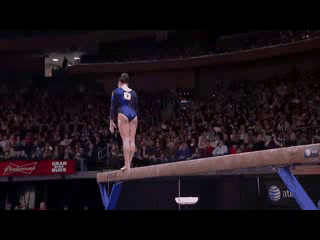

In [ ]:
from IPython.display import Image
sample_filename = '/'.join(['train', train_df.loc[100, 'video_name']])
print(train_df.loc[100, 'tag'])
print(sample_filename)
gif_filename = video_to_gif(sample_filename) # convert an .avi file into a .gif file.
Image(open(gif_filename,'rb').read()) # display the gif file.